In [42]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [43]:
def generate_dataset(mus, sigmas, class_samples_size, save_path):
    dataset = pd.DataFrame(data={'X1': [], 'X2': [], 'Y':[]})
    for i in range(len(mus)):
        x1, x2 = np.random.multivariate_normal(mus[i], sigmas[i], class_samples_size).T
        ds_class_i = pd.DataFrame(data={'X1': x1, 'X2': x2, 'Y': [i] * class_samples_size})
        dataset = pd.concat([dataset, ds_class_i], axis=0)
    dataset.to_csv(save_path, index=False)
    return dataset

# ----> Run once to generate data <----
mu_ds_1 = \
    [[2,5],
    [8,1],
    [5,3]]

sigma_ds_1 = \
    [[[2,0], [0,2]],
    [[3,1], [1,3]],
    [[2,1], [1,2]]]

Dataset = generate_dataset(mu_ds_1, sigma_ds_1, 500, './NPE_dataset1.csv')


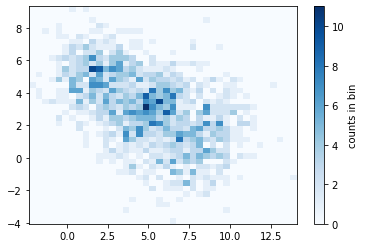

In [44]:
plt.hist2d(Dataset.X1, Dataset.X2, bins=40, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')


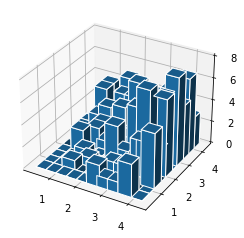

In [65]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(Dataset.X1, Dataset.X2 , bins=10, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average',edgecolor="white")

plt.show()

In [50]:
def histogram( Data, binvalue ):
    minimum1 = min(Data.X1)
    maximum1 = max(Data.X1)
    minimum2 = min(Data.X2)
    maximum2 = max(Data.X2)
    maximum = max(maximum1 , maximum2)
    minimum = min(minimum1 , minimum2)
    lenght = maximum - minimum
    Nbins = lenght / binvalue
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection='3d')
    hist, xedges, yedges = np.histogram2d(Data.X1, Data.X2 , bins=int(Nbins/3), range=[[0, 4], [0, 4]])

    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average' , edgecolor="white")
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.hist(Data.X1, bins=np.arange(min(Data.X1), max(Data.X1) + binvalue, binvalue) , edgecolor="white")
    plt.ylabel('count')
    plt.xlabel('Data')
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.hist(Data.X2, bins=np.arange(min(Data.X2), max(Data.X2) + binvalue, binvalue) , edgecolor="white")
    plt.ylabel('count')
    plt.xlabel('Data')
    plt.show()

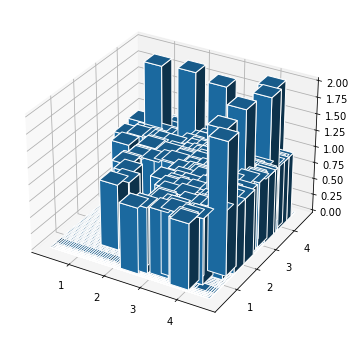

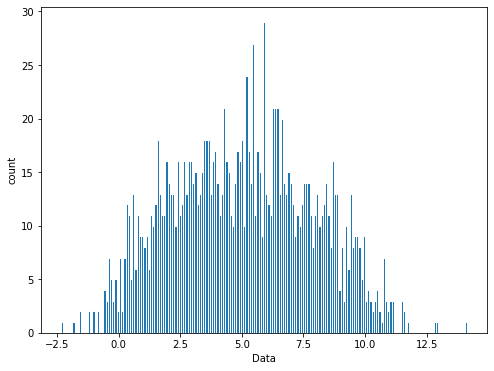

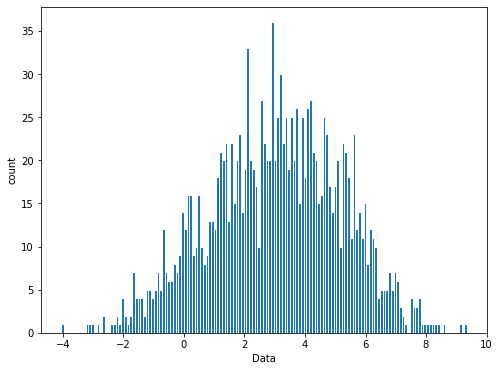

In [51]:

histogram(Dataset ,0.09)


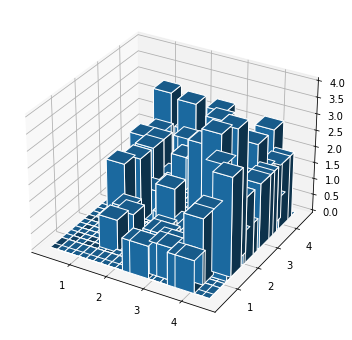

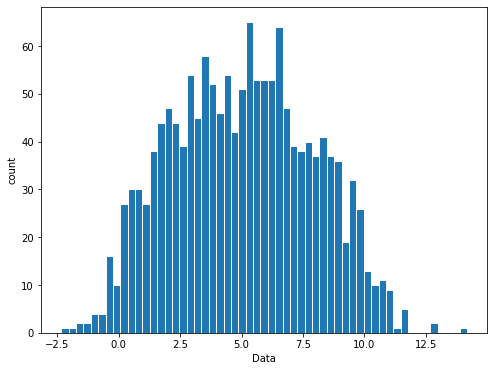

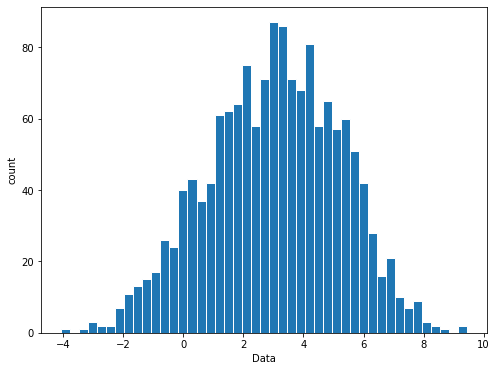

In [52]:
histogram(Dataset ,0.3)

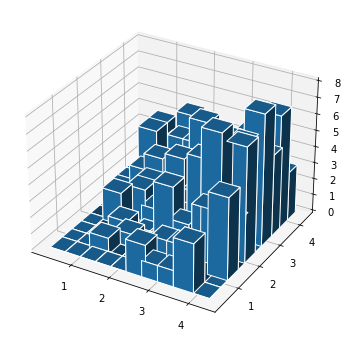

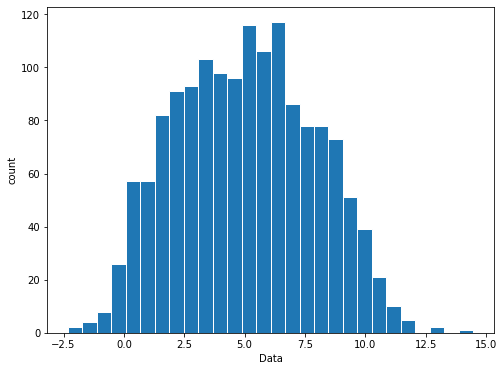

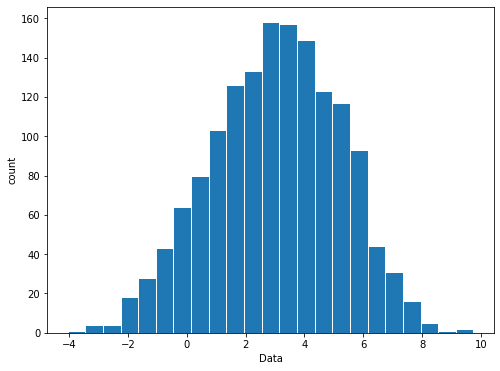

In [53]:
histogram(Dataset ,0.6)